# PA006 - Bank Marketing  Strategy

# Solution Planning ( IOT )

## Imput

 I have been as a Data Scientis Consultant to build a data product that create a customers segmentattion which will handle the marketing strategy and the following expected results from consultancy:
        
        
- 1. Create customer segmentation based on clear selection criteria.
- 2. Make customer segmentation accessible to the operations team.
- 3. Teach the operations team how to use the solution.
- 4. Transfer knowledge to international bank Data Scientists.
- 5. Recommend 3 business levers for each customer segment. 


## Output

- Tools:
    - Jupyter Notebook
    - Metabase
    - Streamlit
    
    
- URL to the Operation team make tests;
- Download of selected data;


# Tasks

- Data Descriptive:
    - NA's replace
    - Outliers Detection
    
    
- EDA:
    - Univariate Analysis
    - Bivariate Analysis
    - Outliers Detection
    - Feature Selection
    - Study of Space
    - Embeding Definition
    
- Machine Learning Training:
    - Performance Analysis
    - Clustering Analysis
    - Define clustering number
    
- EDA - Insights:
    - Expain the segmentattion characters
    
- Table to store the clustered clients
- Creat the production script


- AWS Architecture:
    - S3 for store the data
    - EC2 for store the ETL and visualization tool.
    - DB to store the table 
    - Cronjob
    - Papermill

# 0.1 Imports

# 0.2 Helper functions

In [331]:
import inflection
# import numba as nb
# import  umap.umap_  as umap

import numpy             as np
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt

from sklearn import cluster as c
from sklearn import metrics as m
from sklearn import  manifold  as mn
from  sklearn  import  decomposition as dd
from  sklearn  import  preprocessing as pp

from bayes_opt                   import BayesianOptimization
from bayes_opt                   import UtilityFunction
from matplotlib                  import gridspec
from  pandas_profiling           import ProfileReport
from IPython.core.display        import HTML



In [332]:
def jupyter_settings(): 
    %matplotlib inline 
    #%matplotlib notebook
    %pylab inline
    
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
     
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option ('display.expand_frame_repr', False)
    
    sns.set()

%matplotlib inline 
%matplotlib notebook

plt.style.use('bmh')
plt.rcParams['figure.figsize'] = [25, 12]
plt.rcParams['font.size'] = 24


display( HTML( '<style>.container { width:100% !important; }</style>') )
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option ('display.expand_frame_repr', False)

sns.set()

jupyter_settings()


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# 1.0 Data Discriptive

## 1.1 Load dataset

In [333]:
df1 = pd.read_csv( '/Users/adriele/Documents/repos/pa006/dataset/bank.csv')

## 1.2 Rename columns

In [334]:
df1.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [335]:
df1.columns = [ 'id', 'balance', 'balance_freq', 'purchases','one_purchases', 'install_purchases', 'cash_adv',
       'purchases_freq', 'one_purchases_freq', 'purchases_install_freq', 'cash_adv_freq',
       'cash_adv_trx', 'purchases_trx', 'credit_limit', 'payments','min_pay', 'prc_full_pay', 'tenure']



In [336]:
df1.head(20)

id      balance  balance_freq  purchases  one_purchases  install_purchases     cash_adv  purchases_freq  one_purchases_freq  purchases_install_freq  cash_adv_freq  cash_adv_trx  purchases_trx  credit_limit     payments       min_pay  prc_full_pay  tenure
0   C10001    40.900749      0.818182      95.40           0.00              95.40     0.000000        0.166667            0.000000                0.083333       0.000000             0              2        1000.0   201.802084    139.509787      0.000000      12
1   C10002  3202.467416      0.909091       0.00           0.00               0.00  6442.945483        0.000000            0.000000                0.000000       0.250000             4              0        7000.0  4103.032597   1072.340217      0.222222      12
2   C10003  2495.148862      1.000000     773.17         773.17               0.00     0.000000        1.000000            1.000000                0.000000       0.000000             0             12        7500.0   622.066742    627.284787      0.000000      12
3   C10004  1666.670542      0.636364    1499.00        1499.00               0.00   205.788017        0.083333            0.083333                0.000000       0.083333             1              1        7500.0     0.000000           NaN      0.000000      12
4   C10005   817.714335      1.000000      16.00          16.00               0.00     0.000000        0.083333            0.083333                0.000000       0.000000             0              1        1200.0   678.334763    244.791237      0.000000      12
5   C10006  1809.828751      1.000000    1333.28           0.00            1333.28     0.000000        0.666667            0.000000                0.583333       0.000000             0              8        1800.0  1400.057770   2407.246035      0.000000      12
6   C10007   627.260806      1.000000    7091.01        6402.63             688.38     0.000000        1.000000            1.000000                1.000000       0.000000             0             64       13500.0  6354.314328    198.065894      1.000000      12
7   C10008  1823.652743      1.000000     436.20           0.00             436.20     0.000000        1.000000            0.000000                1.000000       0.000000             0             12        2300.0   679.065082    532.033990      0.000000      12
8   C10009  1014.926473      1.000000     861.49         661.49             200.00     0.000000        0.333333            0.083333                0.250000       0.000000             0              5        7000.0   688.278568    311.963409      0.000000      12
9   C10010   152.225975      0.545455    1281.60        1281.60               0.00     0.000000        0.166667            0.166667                0.000000       0.000000             0              3       11000.0  1164.770591    100.302262      0.000000      12
10  C10011  1293.124939      1.000000     920.12           0.00             920.12     0.000000        1.000000            0.000000                1.000000       0.000000             0             12        1200.0  1083.301007   2172.697765      0.000000      12
11  C10012   630.794744      0.818182    1492.18        1492.18               0.00     0.000000        0.250000            0.250000                0.000000       0.000000             0              6        2000.0   705.618627    155.549069      0.000000      12
12  C10013  1516.928620      1.000000    3217.99        2500.23             717.76     0.000000        1.000000            0.250000                0.916667       0.000000             0             26        3000.0   608.263689    490.207013      0.250000      12
13  C10014   921.693369      1.000000    2137.93         419.96            1717.97     0.000000        0.750000            0.166667                0.750000       0.000000             0             26        7500.0  1655.891435    251.137986      0.083333      12
14  C10015  2772.772734      1.000000       0.00           0.00

## 1.3 Data Dimension

In [337]:
print( 'Number of Cols {}'.format( df1.shape[1] ) )
print( 'Number of Rows {}'.format( df1.shape[0] ) )

Number of Cols 18
Number of Rows 8950


## 1.4 Check NA

In [338]:
df1.isna().sum()

id                          0
balance                     0
balance_freq                0
purchases                   0
one_purchases               0
install_purchases           0
cash_adv                    0
purchases_freq              0
one_purchases_freq          0
purchases_install_freq      0
cash_adv_freq               0
cash_adv_trx                0
purchases_trx               0
credit_limit                1
payments                    0
min_pay                   313
prc_full_pay                0
tenure                      0
dtype: int64

## 1.5 Replace NA

In [339]:
df1 = df1.dropna()

In [340]:
df1.isna().sum()

id                        0
balance                   0
balance_freq              0
purchases                 0
one_purchases             0
install_purchases         0
cash_adv                  0
purchases_freq            0
one_purchases_freq        0
purchases_install_freq    0
cash_adv_freq             0
cash_adv_trx              0
purchases_trx             0
credit_limit              0
payments                  0
min_pay                   0
prc_full_pay              0
tenure                    0
dtype: int64

## 1.6 Data Types

In [341]:
df1.dtypes

id                         object
balance                   float64
balance_freq              float64
purchases                 float64
one_purchases             float64
install_purchases         float64
cash_adv                  float64
purchases_freq            float64
one_purchases_freq        float64
purchases_install_freq    float64
cash_adv_freq             float64
cash_adv_trx                int64
purchases_trx               int64
credit_limit              float64
payments                  float64
min_pay                   float64
prc_full_pay              float64
tenure                      int64
dtype: object

In [342]:
df1['id'] = df1['id'].replace('C', '', regex=True).astype( int)

In [343]:
df2.dtypes

id                          int64
balance                   float64
balance_freq              float64
purchases                 float64
one_purchases             float64
install_purchases         float64
cash_adv                  float64
purchases_freq            float64
one_purchases_freq        float64
purchases_install_freq    float64
cash_adv_freq             float64
cash_adv_trx                int64
purchases_trx               int64
credit_limit              float64
payments                  float64
min_pay                   float64
prc_full_pay              float64
tenure                      int64
dtype: object

# 1.7  Descriptive Startisc

Location Estimate:

    - Mean = Soma of all value divided for the quantity of value.
    - Median = middle value - midpoint value when the dataset is divided into 2 parts.
    - Minimum = The lower value on dataset.
    - Maximum = The big value on dataset.
    
    
Variable Estimate:

    - Deviation = Variable estimete that meansure the values dispersion from dataset around a location estimate (mean).  
    - Standard Deviation = Is the points averange distance around a locatio metric, tha's the mean. + the variance calculete  
    - Variance = Is the calculation of squared deviations by subtracting 1
    - Range
   

## Skewness

- Is the dimersion of a data distribution, copared a normal distribution, and can be: positieve or negative / to right or to left / low or high.
    
        - Close to  0 = Normal distribution;
        - Close to -1 = Negative distribution;
        - Close to +1 = Positive distribution;
        
        - Median > Mean = Tail shifted to the left = Negative skweness;
        10 - 15 = -5
        - Median < Mean = Tail shifted to the right = Positive skweness;
        10 - 8 = 2

## Kurtoses 

- Show the long tails ( the probability of extrame values appear, even its max or min) 

## Quantile

- Any of 3 values that separete a dataset, ordely in 4 equal parts, each part represent 1/4  from origina sample.



    - First Quantile  (bottom) = Is the part of dataset that delimit 25% from dataset;
    - Second Quantile (middle) = Is the part of dataset that delimit 50% from dataset;
    - Third Quantile  ( top )  = Is the part of dataset that delimit 75% from dataset;

## Percentile

- Are the meansures that divide a ordely sample in 100 equal parts.

    - Perc. 01 = 1% from dataset.
    - Perc. 10 = 10% from dataset.
    - Perc. 25 = 25% from dataset => First Quantile.
    - Perc. 50 = 50% from dataset => Second Quantile.
    - Perc. 75 = 75% from dataset => Third Quantile.

In [344]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude=[ 'int64', 'float64', 'datetime64[ns]'] )

## 1.7.1 Numerical Atributes

In [345]:
# Central Tendency - mean, Median
ct1 = pd.DataFrame (num_attributes.apply (np.mean) ).T
ct2 = pd.DataFrame (num_attributes.apply (np.median) ).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame (num_attributes.apply (np.std) ).T
d2 = pd.DataFrame (num_attributes.apply (min)).T
d3 = pd.DataFrame (num_attributes.apply (max)).T
d4 = pd.DataFrame (num_attributes.apply (lambda x: x.max () -x.min ()) ).T
d5 = pd.DataFrame (num_attributes.apply (lambda x: x.skew () ) ).T
d6 = pd.DataFrame (num_attributes.apply (lambda x: x.kurtosis ()) ).T

# Concatane
med =pd.concat ([ d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
med.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']


# Percetis
percentis =  num_attributes.apply( lambda x: np.percentile( x, q=[10, 25, 50, 75, 95,99] ) ).T.reset_index()
percentis.columns = ['attributes', 'P10', 'P25', 'P50', 'P75', 'P95', 'P99']

m2 = pd.merge( med, percentis, how='inner', on='attributes')
m2

attributes           min          max         range          mean        median          std       skew    kurtosis           P10           P25           P50           P75           P95           P99
0                       id  10001.000000  19190.00000   9189.000000  14602.540875  14592.500000  2632.620316   0.002494   -1.188784  10960.500000  12337.750000  14592.500000  16885.250000  18719.250000  19098.650000
1                  balance      0.000000  19043.13856  19043.138560   1601.224893    916.855459  2095.449969   2.374254    7.553876     29.093764    148.095189    916.855459   2105.195853   5936.635587   9369.550879
2             balance_freq      0.000000      1.00000      1.000000      0.895035      1.000000     0.207685  -2.084161    3.369586      0.545455      0.909091      1.000000      1.000000      1.000000      1.000000
3                purchases      0.000000  49039.57000  49039.570000   1025.433874    375.405000  2166.982511   8.055789  108.677684      0.000000     43.367500    375.405000   1145.980000   4060.092500   9127.092000
4            one_purchases      0.000000  40761.25000  40761.250000    604.901438     44.995000  1684.210284   9.935776  160.121308      0.000000      0.000000     44.995000    599.100000   2728.372500   6783.896500
5        install_purchases      0.000000  22500.00000  22500.000000    420.843533     94.785000   917.192075   7.216133   94.193373      0.000000      0.000000     94.785000    484.147500   1800.000000   3916.483000
6                 cash_adv      0.000000  47137.21176  47137.211760    994.175523      0.000000  2121.335473   5.139629   52.143523      0.000000      0.000000      0.000000   1132.385490   4721.415498   9681.634354
7           purchases_freq      0.000000      1.00000      1.000000      0.496000      0.500000     0.401249   0.033041   -1.638001      0.000000      0.083333      0.500000      0.916667      1.000000      1.000000
8       one_purchases_freq      0.000000      1.00000      1.000000      0.205909      0.083333     0.300036   1.504234    1.058206      0.000000      0.000000      0.083333      0.333333      1.000000      1.000000
9   purchases_install_freq      0.000000      1.00000      1.000000      0.368820      0.166667     0.398070   0.487753   -1.419279      0.000000      0.000000      0.166667      0.750000      1.000000      1.000000
10           cash_adv_freq      0.000000      1.50000      1.500000      0.137604      0.000000     0.201780   1.795915    3.184233      0.000000      0.000000      0.000000      0.250000      0.583333      0.833333
11            cash_adv_trx      0.000000    123.00000    123.000000      3.313918      0.000000     6.912106   5.673327   60.428523      0.000000      0.000000      0.000000      4.000000     15.000000     30.000000
12           purchases_trx      0.000000    358.00000    358.000000     15.033233      7.000000    25.179010   4.578418   33.952279      0.000000      1.000000      7.000000     18.000000     59.000000    117.650000
13            credit_limit     50.000000  30000.00000  29950.000000   4522.091030   3000.000000  3659.028513   1.507019    2.773473   1200.000000   1600.000000   3000.000000   6500.000000  12000.000000  17000.000000
14                payments      0.049513  50721.48336  50721.433847   1784.478099    896.675701  2909.641616   5.873049   54.270814    214.777650    418.559237    896.675701   1951.142090   6152.318659  13657.620792
15                 min_pay      0.019163  76406.20752  76406.188357    864.304943    312.452292  2372.428981  13.622193  283.963042    106.113465    169.163545    312.452292    825.496463   2766.593894   9037.885662
16            prc_full_pay      0.000000      1.00000      1.000000      0.159304      0.000000     0.296254   1.886027    2.201598      0.000000      0.000000      0.000000      0.166667      1.000000      1.000000
17                  tenure      6.000000     12.00000      6.000000     11.534391     12.000000     1.310908  -3.011141    8.156

- Min_pay = has a skew of 13.62 - Low customers are doing the minimum payment;
- Purchase = 0, mean that there are some custumer that never used the card.
- adv_cash_freq = most of custumers doesn't use the cash adv from card.
- Purchase_trx = show that the most of custumer has lower purchases on card.

In [348]:
## Id = Codigo indentificador unico para cada cliente.

## Balance =  Quanto eu ja gastei no cartao de credito ( a fatura)
## Possiveis Outliers

## Segunda opcao p o Balance = Fatura atual - limite do catao. O quanto falta de limite disponivel p
## Possiveis Outliers.

## Balace Frequency = Frequencia de uso do cartao ( usabilidade )

## Purchases = Valor gasto no catao nos ultimos 6 meses( a soma de todos os valores quando a pessoa passou o cartao )

## Purchase One Off = Soma de todas as compras pagas em 1x no cartao nos ultimos 6 meses.

## Installment Purchases = Soma de todas compras pagas em mais de 1x no cartao de credito nos ultimos 6 meses.
## ( Categoria )

## Cash Advance = Valor do saque do limite do cartao de credito acumulado dos ultimos 6 meses.

## Purchase Frequency =  Um valor de 0 e 1 que indentifica a frequencia de compras do cliente.

## Cash Advance Frequency = A frequencia com o cliente faz retiradas de dinheiro do seu cartao de credito.

## Cash Advance TRX = Quantidade de saques da contas do cartao de credito.

## Purchase TRX =  A quantidade de compras realizadas no cartao de credito.

## Credit Limit = O valor limite do cartao de credito do cliente.

## Payments = O valor pago alem do minimo da fatura ( nao necessariamente a fatura total )
# Ex:
# Fatura total = 300
# pagamento minimi = 2000
# Pagamento efetivo = 2500

#Payment = 500
# Minimum Payment =  2000
# pagamento total = Payment + Minimum Payment = 2500

## Minimum Payments = Valor minimo pago da fatura.

## Tenure =  O tempo de posse do cartao em messes( tempo em que a pessoa e cliente do banco )


<AxesSubplot: xlabel='credit_limit', ylabel='Count'>

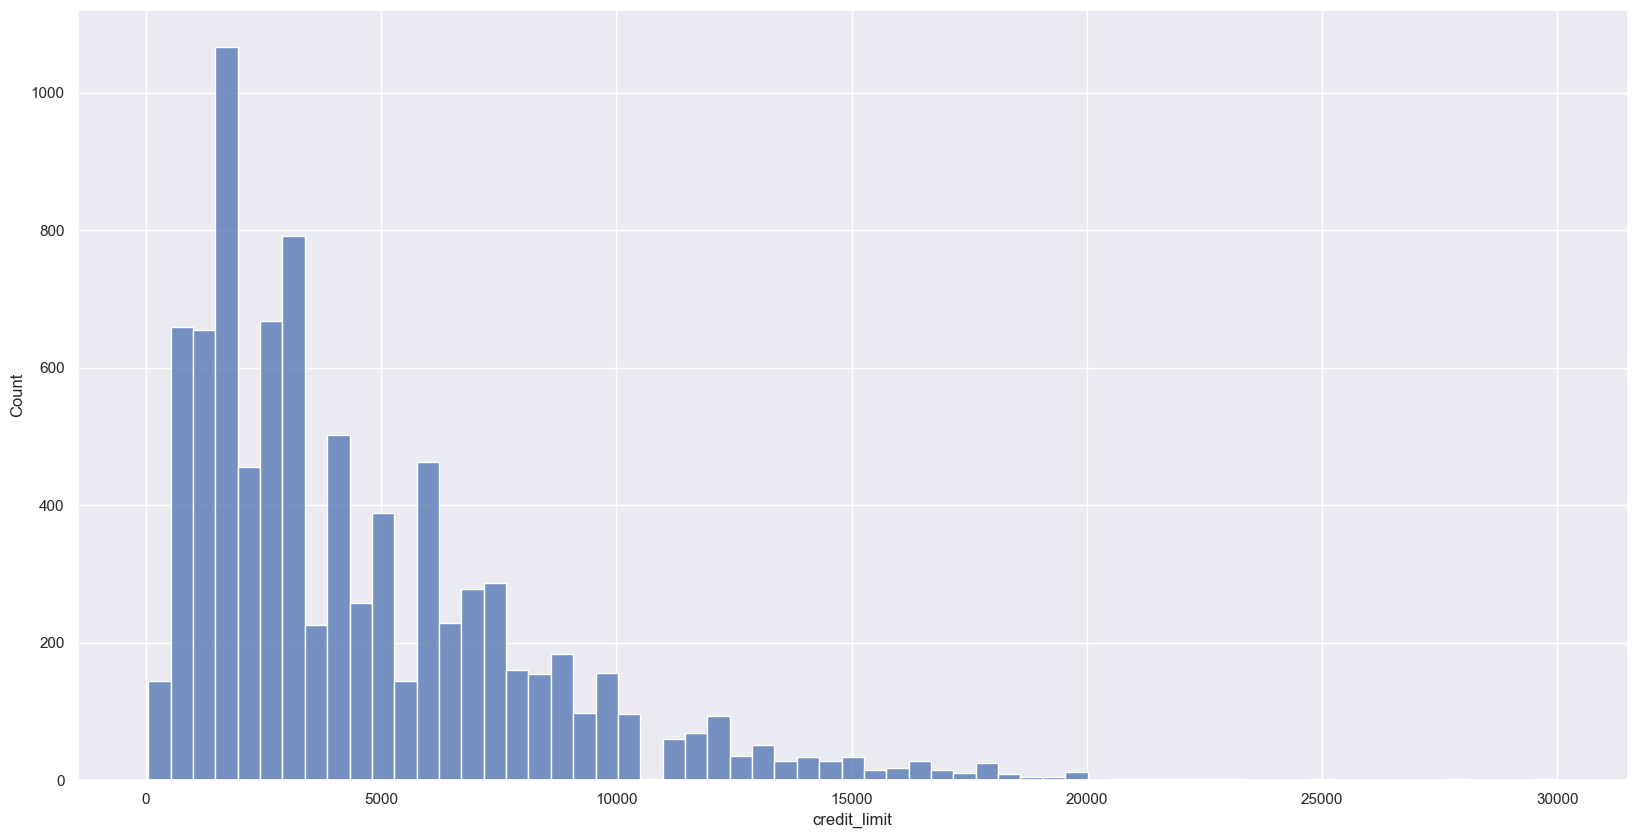

In [346]:
plt.figure( figsize=( 20, 10) )
sns.histplot( x='credit_limit', data=num_attributes )

## Box Plot
- Show the 4 attributes principal of a feature: 
    - center
    - Variability
    - Asymmetry 
    - Outliers.


Attributes:
- Outliers
- Minimum
- Quartile 1
- Quartile 2
- Quartile 3
- Maximun
- Outliers

<AxesSubplot: xlabel='credit_limit'>

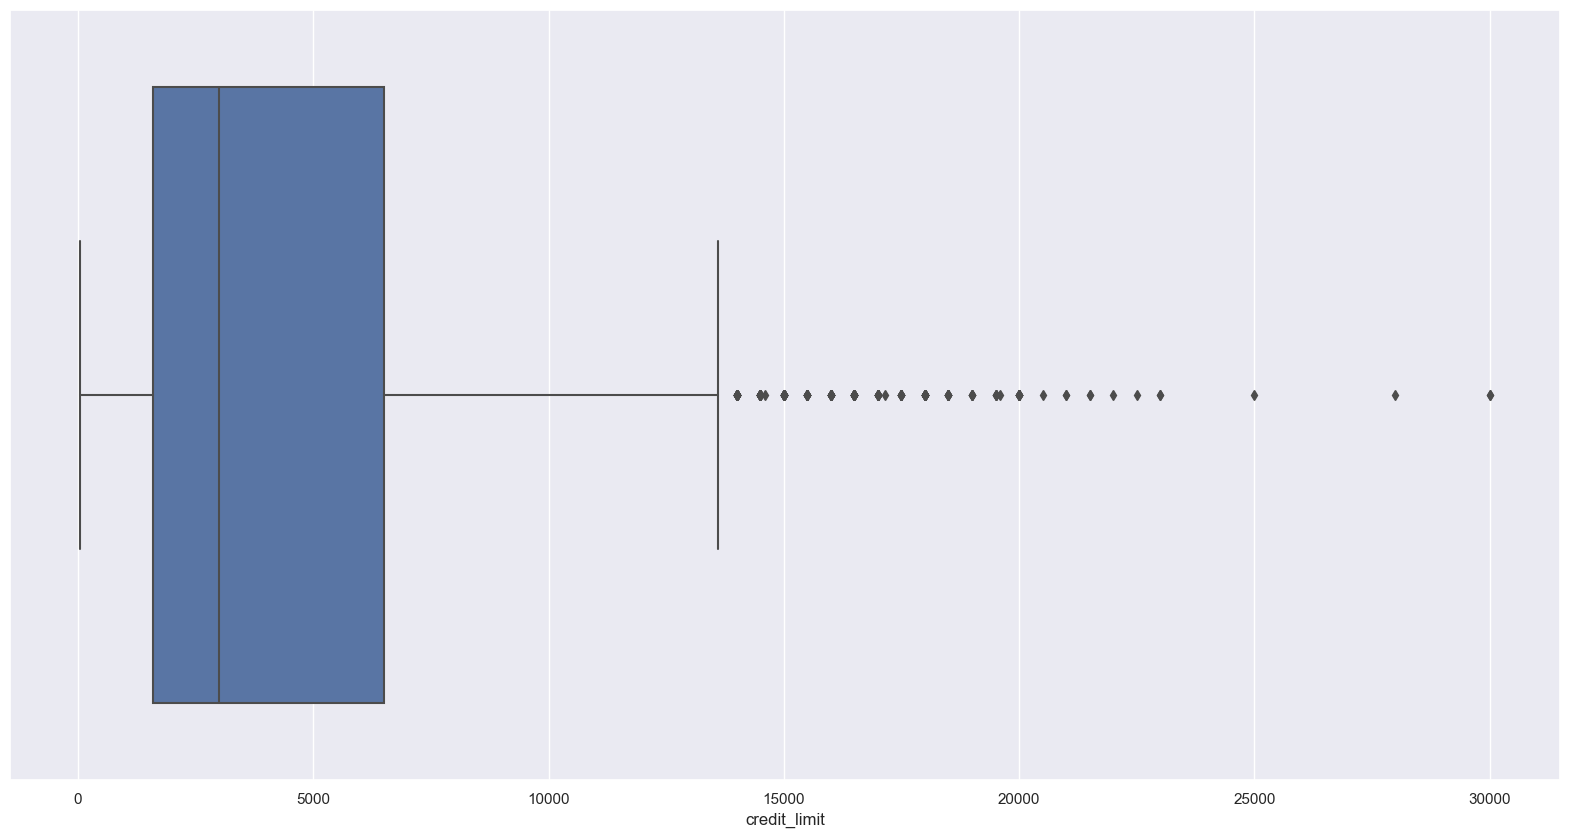

In [328]:
plt.figure( figsize=( 20, 10) )
sns.boxplot( x='credit_limit', data=num_attributes )

In [329]:
np.quantile( num_attributes['credit_limit'], q=[0.25, 0.50, 0.75] )

array([1600., 3000., 6500.])

In [330]:
q1 = 1600
q2 = 3000
q3 = 6500

In [314]:
minq =  q1 - 1.5 * ( q3 - q1)
minq

-5750.0

In [318]:
num_attributes['credit_limit'].min()

50.0

In [316]:
maxq = q3 + 1.5 * ( q3 -q1)
maxq

13850.0

In [320]:
# #calculate real minimum and maximum

# minq =  q1 - 1.5 * ( q3 - q1)
# maxq = q3 + 1.5 * ( q3 -q1)

# if minq < min_value_from_dataset:
#     print( num_attributes[ 'credit_limit' ].min() )
    
# else:
#     print( minq)
    


    
# if maxq > max_value_from_dataset:
#     print( max_value_from_datase) 
    
# else:
#     print( maxq)    


## Violin Plot
- Show the 4 attributes principal of a feature: 
    - Center
    - Variability
    - Asymmetry 
    - Outliers
    - Density.

<AxesSubplot: xlabel='credit_limit'>

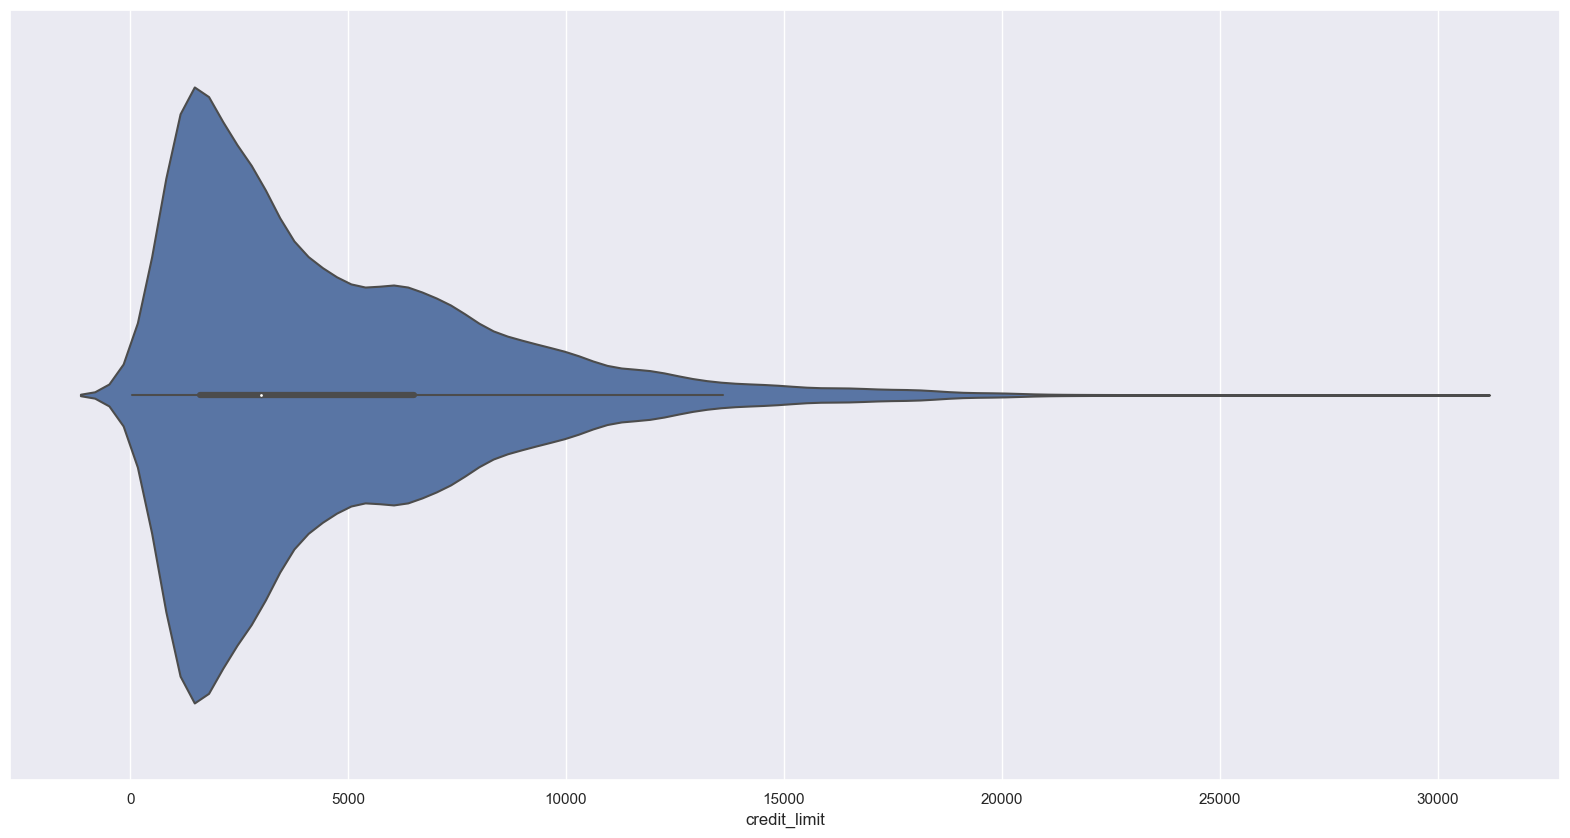

In [321]:
plt.figure( figsize=( 20, 10) )
sns.violinplot( x='credit_limit', data=num_attributes )

# 2.0 Data Filtering

In [300]:
df2 = df1.copy()

# 3.0 Feature Engeneering

In [301]:
df3 = df2.copy()

In [ ]:
## Dimensao:

# Tempo ( Ano, mes , dia, hora e minuto )
# Espaco ( localizacao, regiao, lat, log, bairro, rua )
# Produto ( nome, tipo, categoria, preco, condicao de compra )
# Marketing ( organica, paid{ facebook, google})

# 3.1 Unit Price

In [251]:
# df3.loc[:,'unit_price'] = df3.loc[:, 'purchases_trx'] / df3.loc[:, 'purchases']

# 3.2 Gross Revenue

In [252]:
# df3.loc[:,'gross_revenue'] = df3.loc[:, 'purchases_trx'] * df3.loc[:, 'unit_price']


In [253]:
# df3 = df3.dropna()

# 4.0 Exploratory Data Analysis

In [302]:
df4 = df3.copy()

In [303]:
df4.head()

id      balance  balance_freq  purchases  one_purchases  install_purchases     cash_adv  purchases_freq  one_purchases_freq  purchases_install_freq  cash_adv_freq  cash_adv_trx  purchases_trx  credit_limit     payments      min_pay  prc_full_pay  tenure
0  10001    40.900749      0.818182      95.40           0.00              95.40     0.000000        0.166667            0.000000                0.083333           0.00             0              2        1000.0   201.802084   139.509787      0.000000      12
1  10002  3202.467416      0.909091       0.00           0.00               0.00  6442.945483        0.000000            0.000000                0.000000           0.25             4              0        7000.0  4103.032597  1072.340217      0.222222      12
2  10003  2495.148862      1.000000     773.17         773.17               0.00     0.000000        1.000000            1.000000                0.000000           0.00             0             12        7500.0   622.066742   627.284787      0.000000      12
4  10005   817.714335      1.000000      16.00          16.00               0.00     0.000000        0.083333            0.083333                0.000000           0.00             0              1        1200.0   678.334763   244.791237      0.000000      12
5  10006  1809.828751      1.000000    1333.28           0.00            1333.28     0.000000        0.666667            0.000000                0.583333           0.00             0              8        1800.0  1400.057770  2407.246035      0.000000      12


## 4.1 Univariate Analysis


In [188]:
profile = ProfileReport( df4 )
profile.to_file( 'output.html' )

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/Users/adriele/opt/anaconda3/envs/env_pa006/lib/python3.9/site-packages/numpy/core/_methods.py:236: RuntimeWarning: invalid value encountered in subtract
  x = um.multiply(x, x, out=x)
/Users/adriele/opt/anaconda3/envs/env_pa006/lib/python3.9/site-packages/multimethod/__init__.py:315: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return func(*args, **kwargs)
/Users/adriele/opt/anaconda3/envs/env_pa006/lib/python3.9/site-packages/pandas_profiling/model/correlations.py:67: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydata

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

/var/folders/pc/6sglrsq96ws5kp74fjj4j02h0000gn/T/ipykernel_51579/1067673158.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot (df4['payments'])


<AxesSubplot: xlabel='payments', ylabel='Density'>

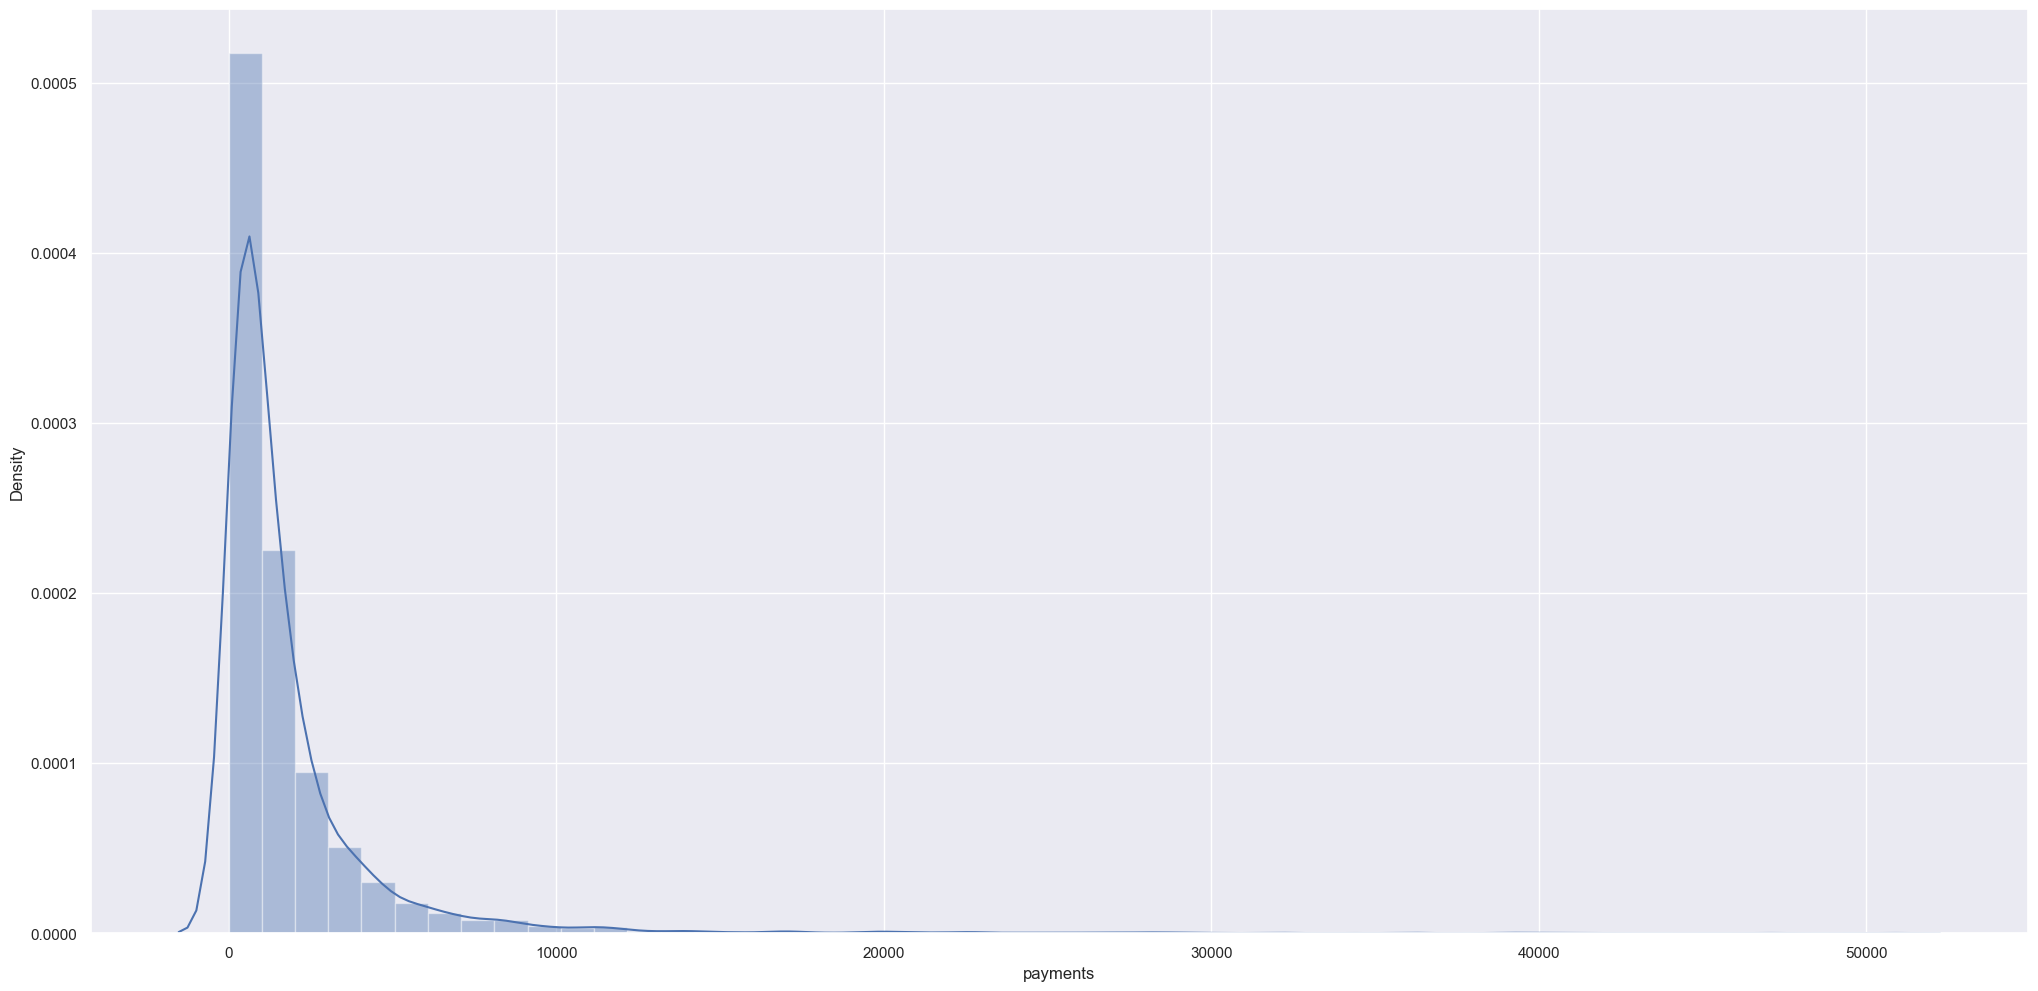

In [189]:
sns.distplot (df4['payments'])

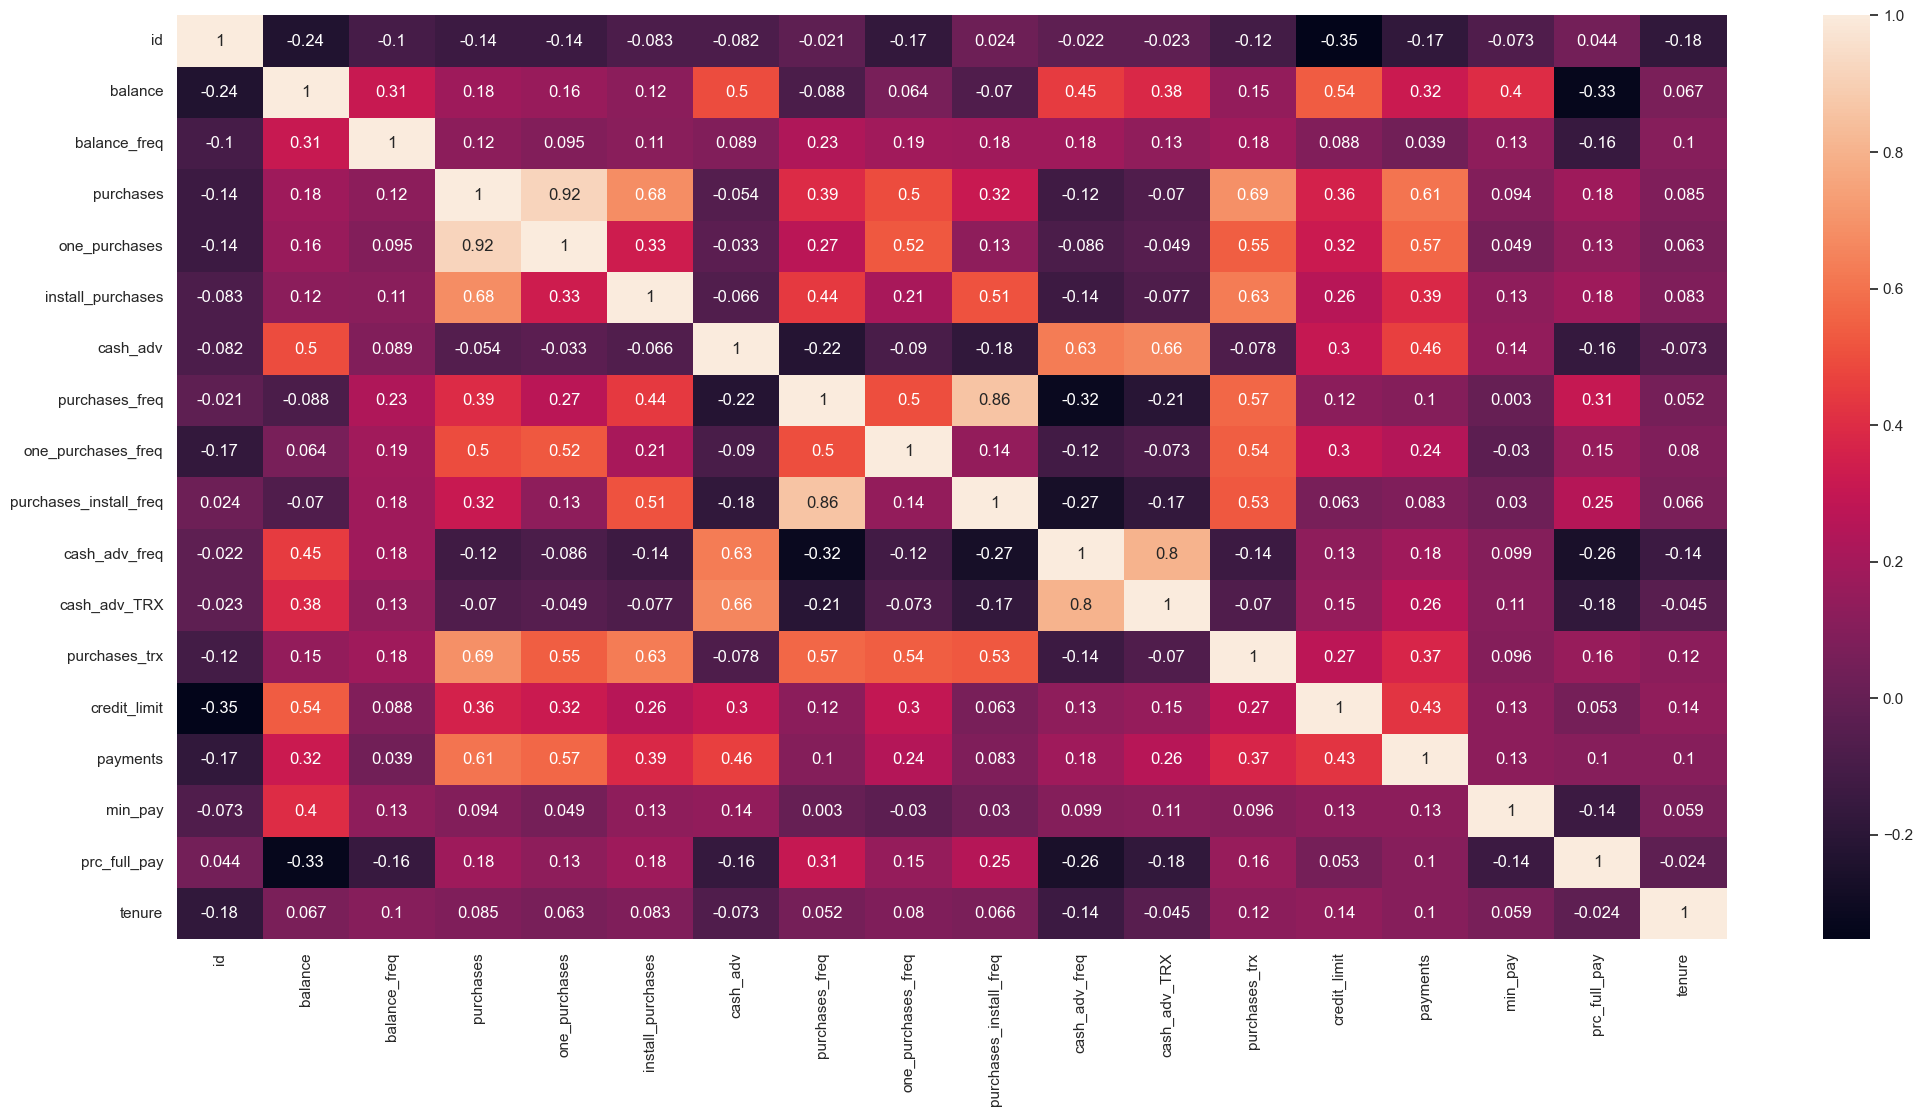

In [216]:
correlation = num_attributes.corr (method = 'pearson')
sns.heatmap (correlation, annot = True);

## 4.2 Bivariate Analysis


In [208]:
cols = ['id']
df42 = df4.drop( cols, axis=1 )

<Figure size 2500x1200 with 0 Axes>

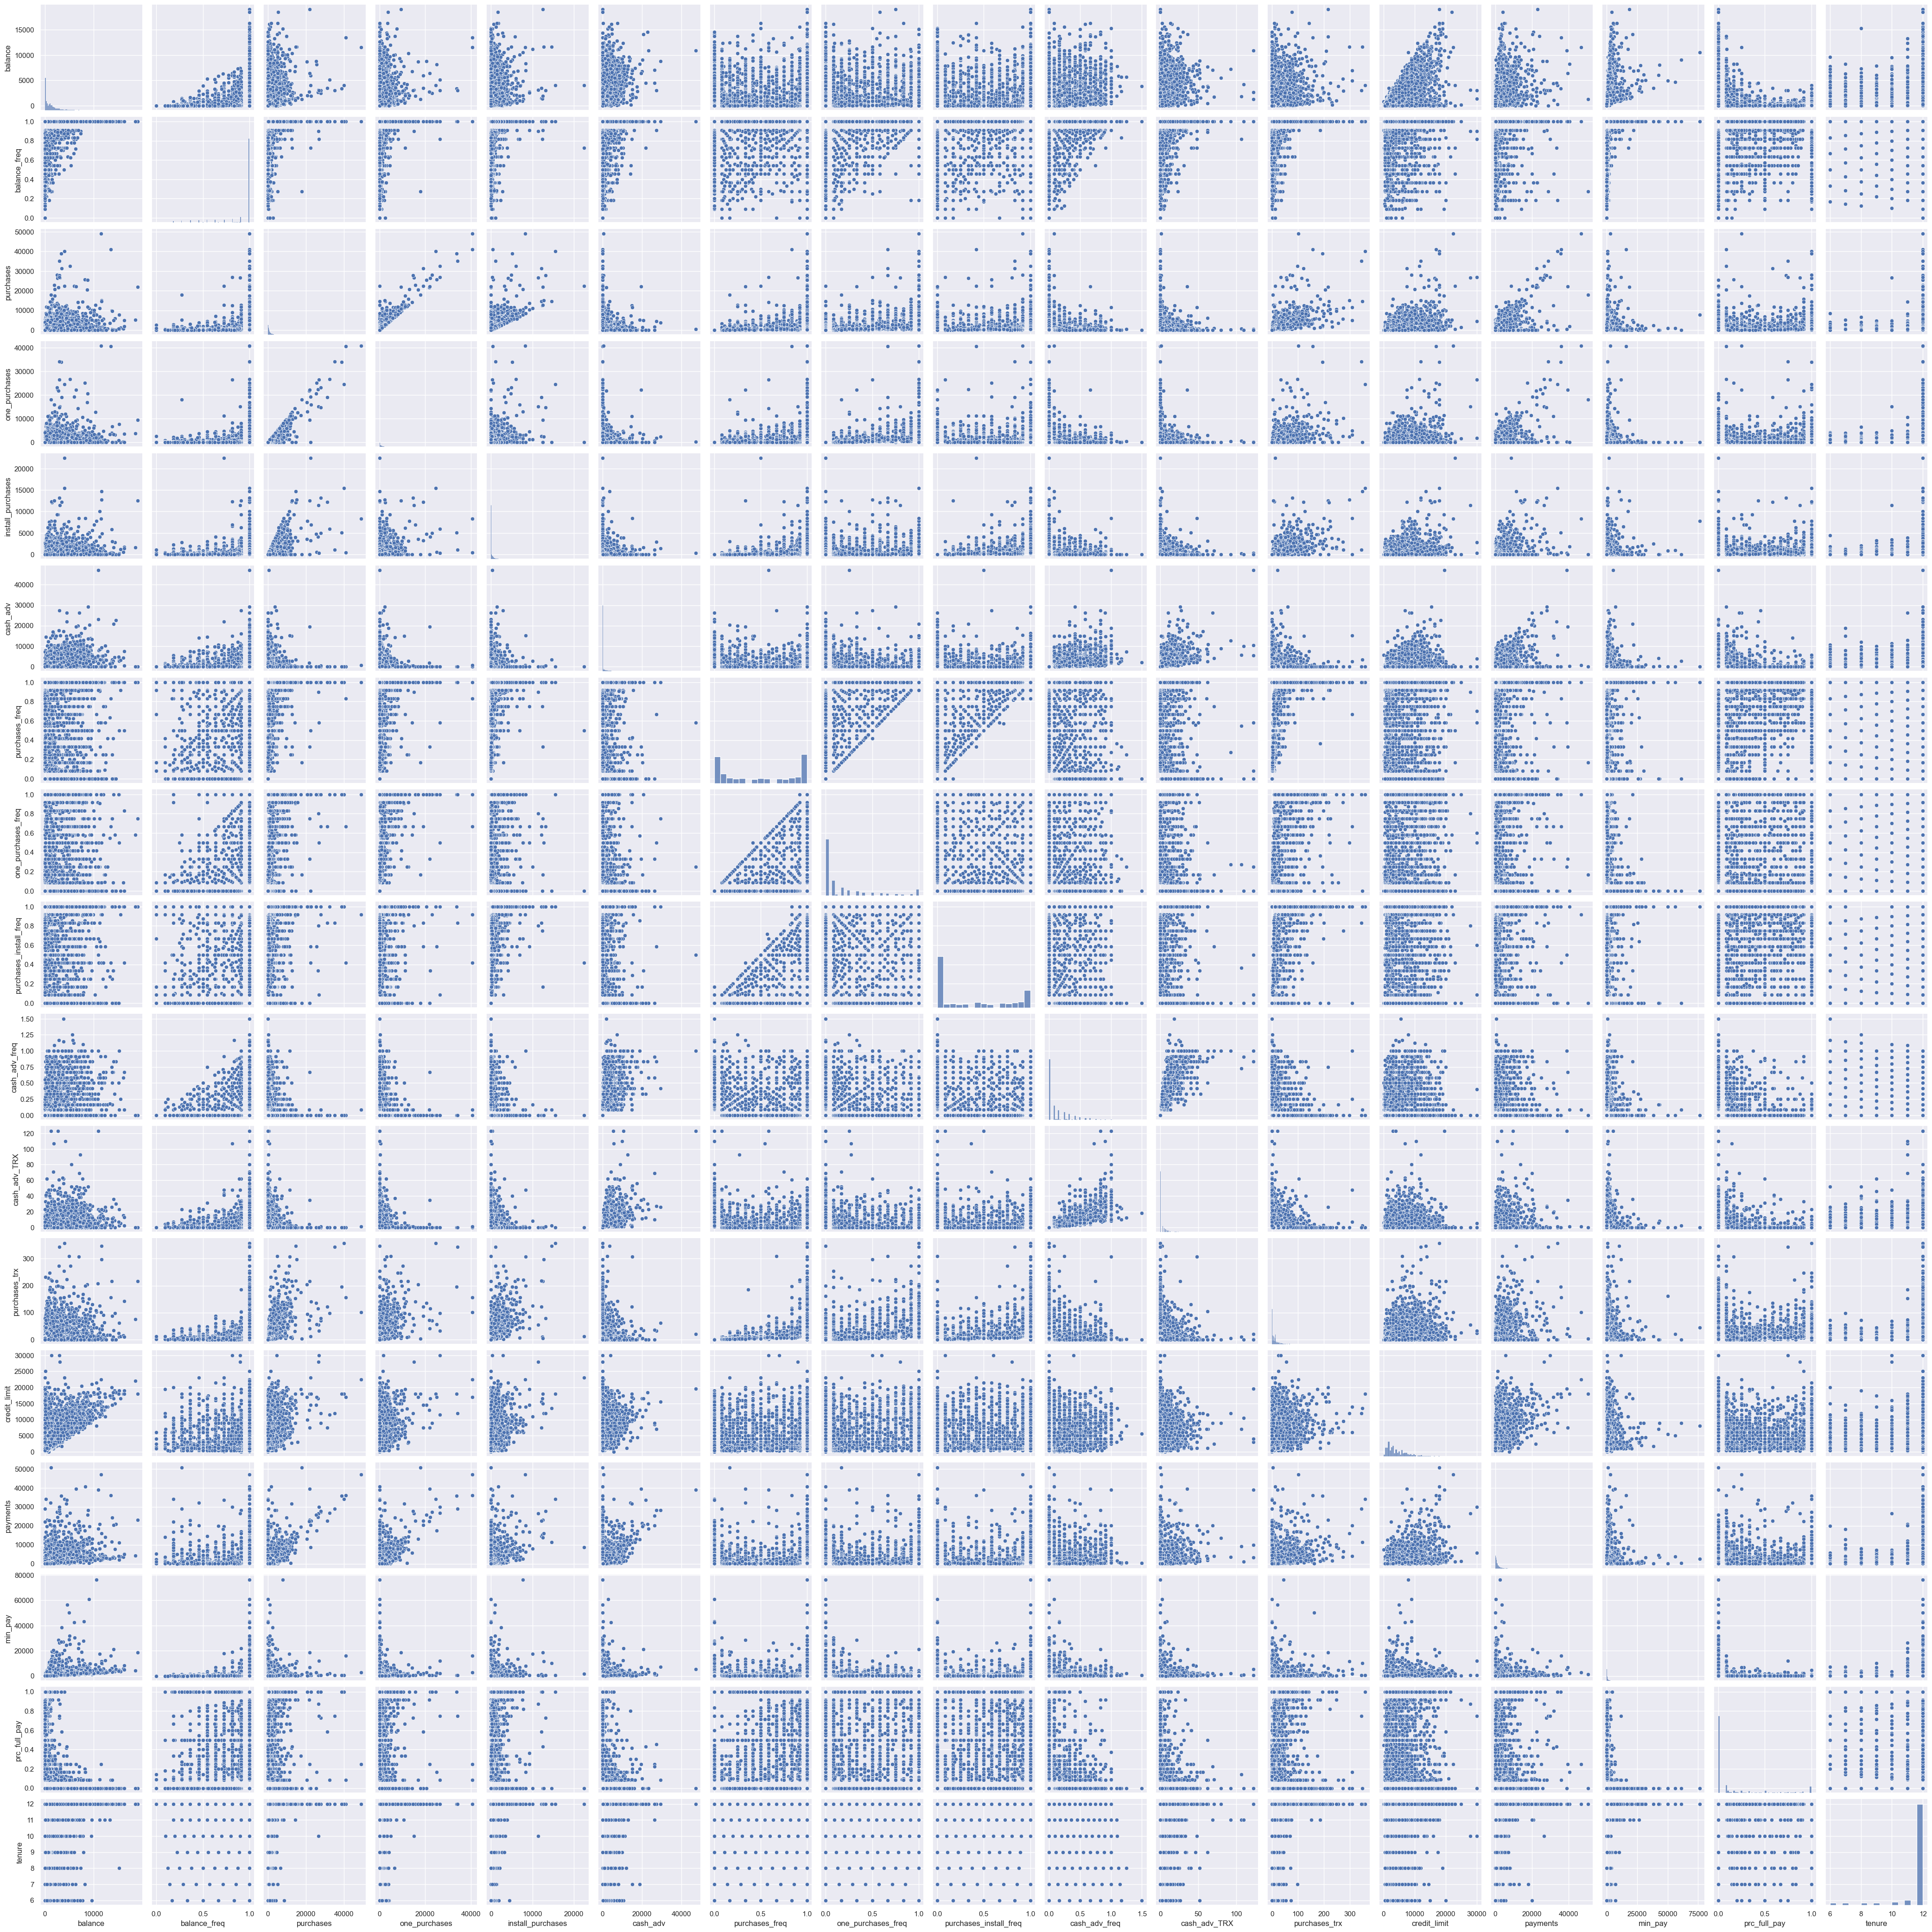

In [209]:
plt.figure( figsize=(25, 12) )
sns.pairplot( df42)

## 4.3 Outliers Detection


<AxesSubplot: >

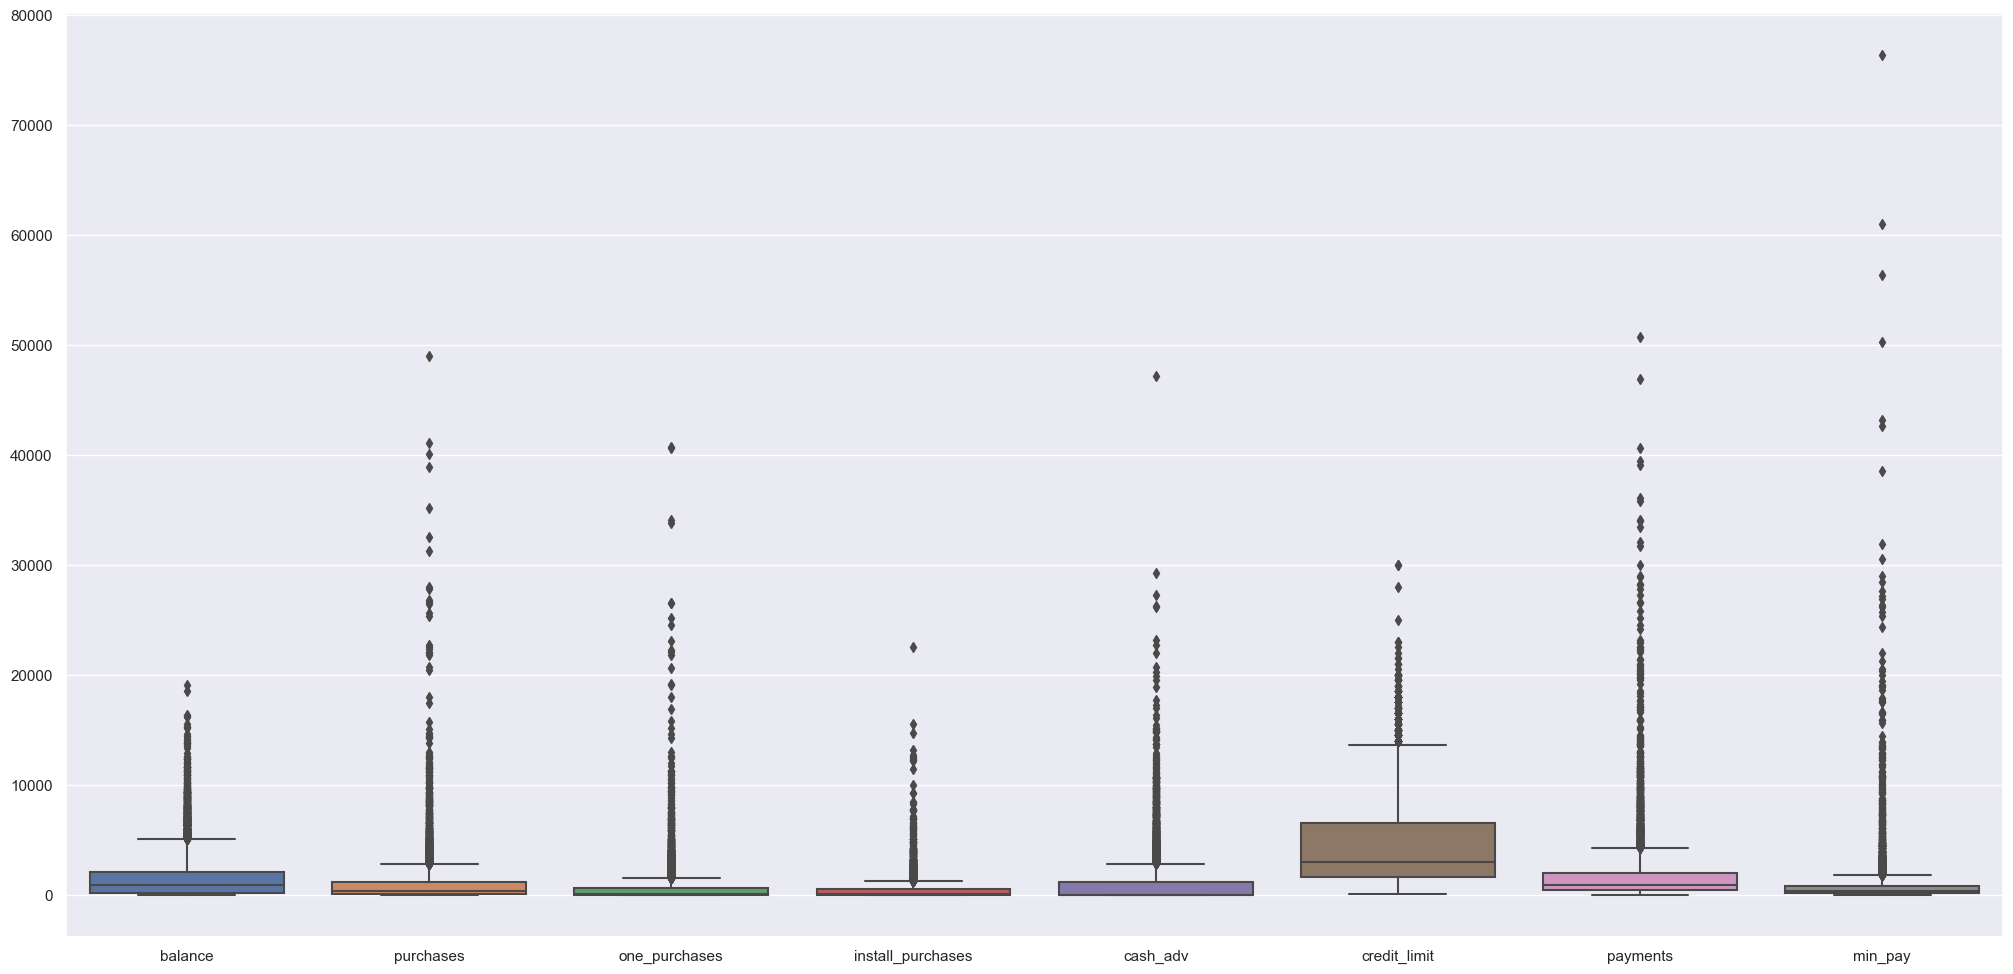

In [225]:
a = df4.select_dtypes (include = ['int64', 'float64'])

sns.boxplot (df4[['balance', 'purchases', 'one_purchases','install_purchases', 'cash_adv', 'credit_limit', 'payments', 'min_pay' ]] )

## 4.4 Feature Selection


In [258]:
df44 = df4.drop( columns=['id'] ) 

In [259]:
df44.columns

Index(['balance', 'balance_freq', 'purchases', 'one_purchases',
       'install_purchases', 'cash_adv', 'purchases_freq', 'one_purchases_freq',
       'purchases_install_freq', 'cash_adv_freq', 'cash_adv_trx',
       'purchases_trx', 'credit_limit', 'payments', 'min_pay', 'prc_full_pay',
       'tenure'],
      dtype='object')

In [261]:
mm = pp.MinMaxScaler()

df44['tenure'] = mm.fit_transform( df44[['tenure']] )
df44['balance'] = mm.fit_transform( df44[['balance']] )
df44['min_pay'] = mm.fit_transform( df44[['min_pay']] )
df44['payments'] = mm.fit_transform( df44[['payments']] )
df44['cash_adv'] = mm.fit_transform( df44[['cash_adv']] )
df44['purchases'] = mm.fit_transform( df44[['purchases']] )
df44['cash_adv_trx'] = mm.fit_transform( df44[['cash_adv_trx']] )
df44['balance_freq'] = mm.fit_transform( df44[['balance_freq']] )
df44['credit_limit'] = mm.fit_transform( df44[['credit_limit']] )
df44['prc_full_pay'] = mm.fit_transform( df44[['prc_full_pay']] )
df44['cash_adv_freq'] = mm.fit_transform( df44[['cash_adv_freq']] )
df44['one_purchases'] = mm.fit_transform( df44[['one_purchases']] )
df44['purchases_trx'] = mm.fit_transform( df44[['purchases_trx']] )
df44['purchases_freq'] = mm.fit_transform( df44[['purchases_freq']] )
df44['install_purchases'] = mm.fit_transform( df44[['install_purchases']] )
df44['one_purchases_freq'] = mm.fit_transform( df44[['one_purchases_freq']] )
df44['purchases_install_freq'] = mm.fit_transform( df44[['purchases_install_freq']] )

x = df44.copy()

## 4.5 Study of Space


### 4.5.1 PCA

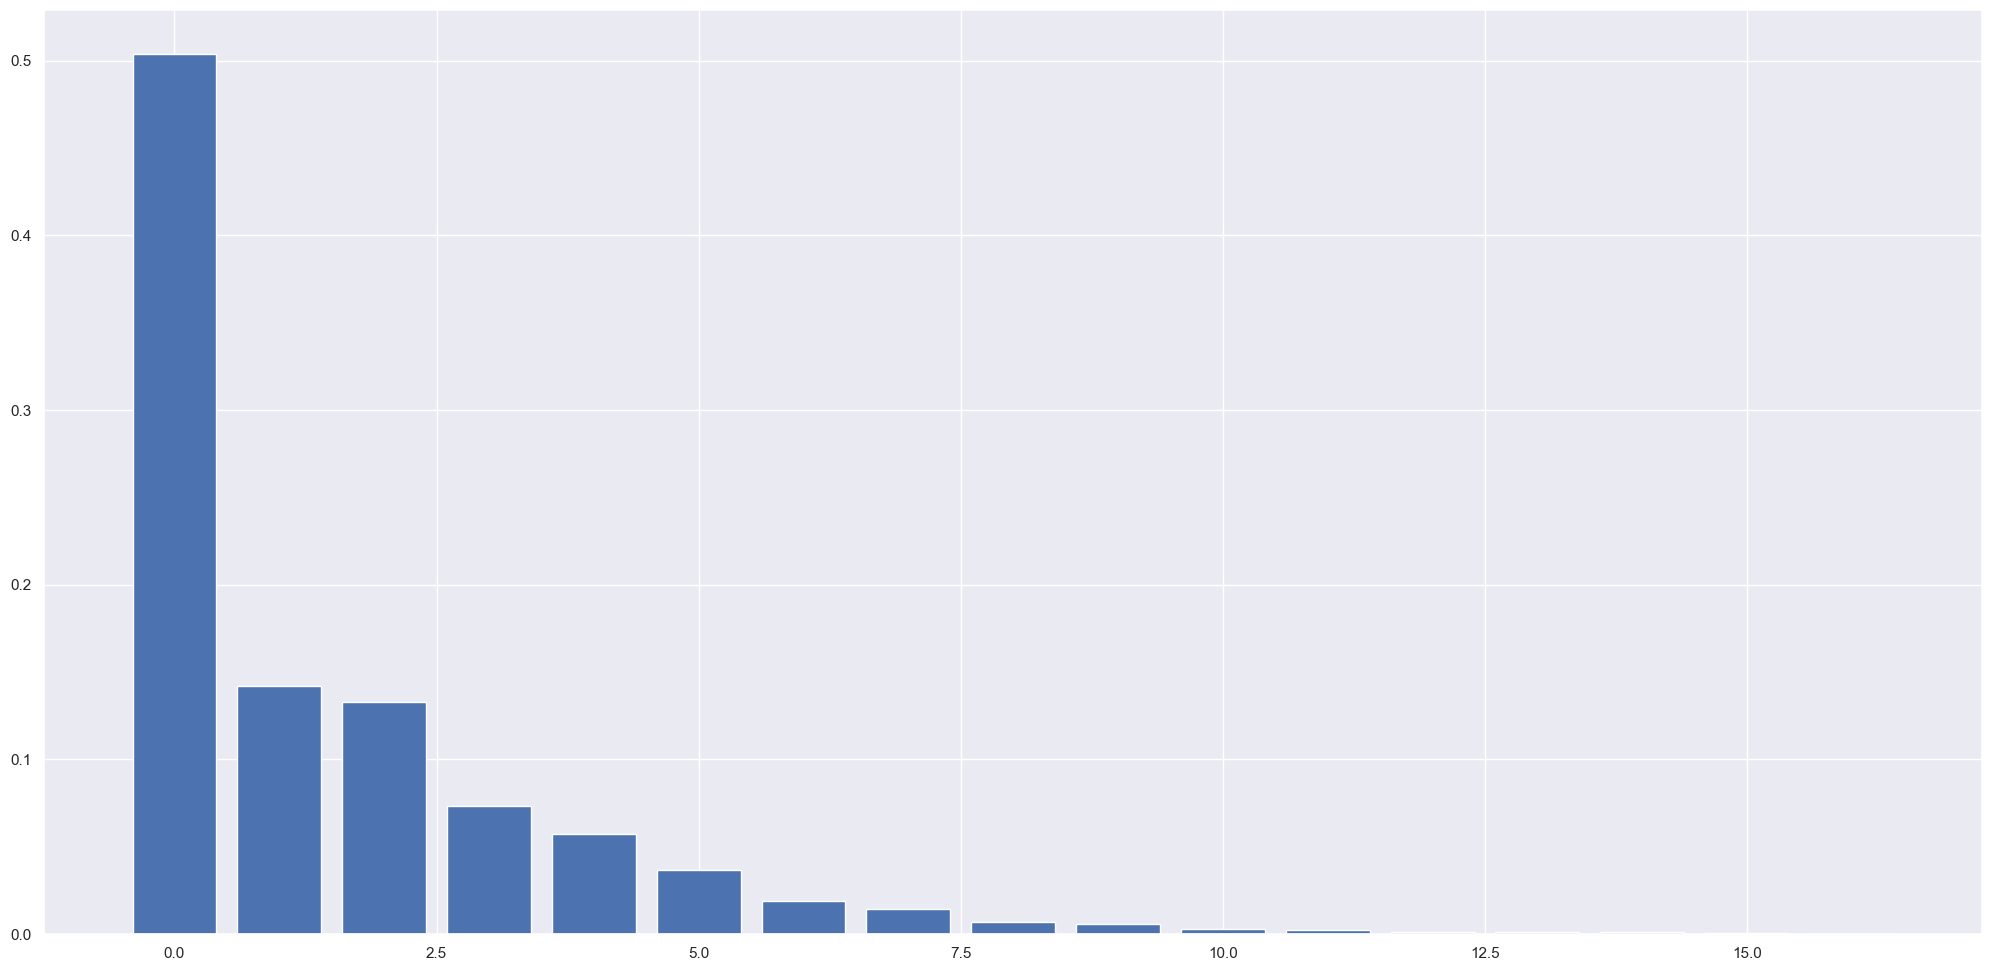

In [264]:
pca = dd.PCA( n_components =  x.shape[1] )

principal_components = pca.fit_transform( x )

# Plot Explaneid Variable
features = range( pca.n_components_ )

plt.bar( features, pca.explained_variance_ratio_)

# PCA Conponent
df_pca = pd.DataFrame( principal_components )

<AxesSubplot: xlabel='0', ylabel='1'>

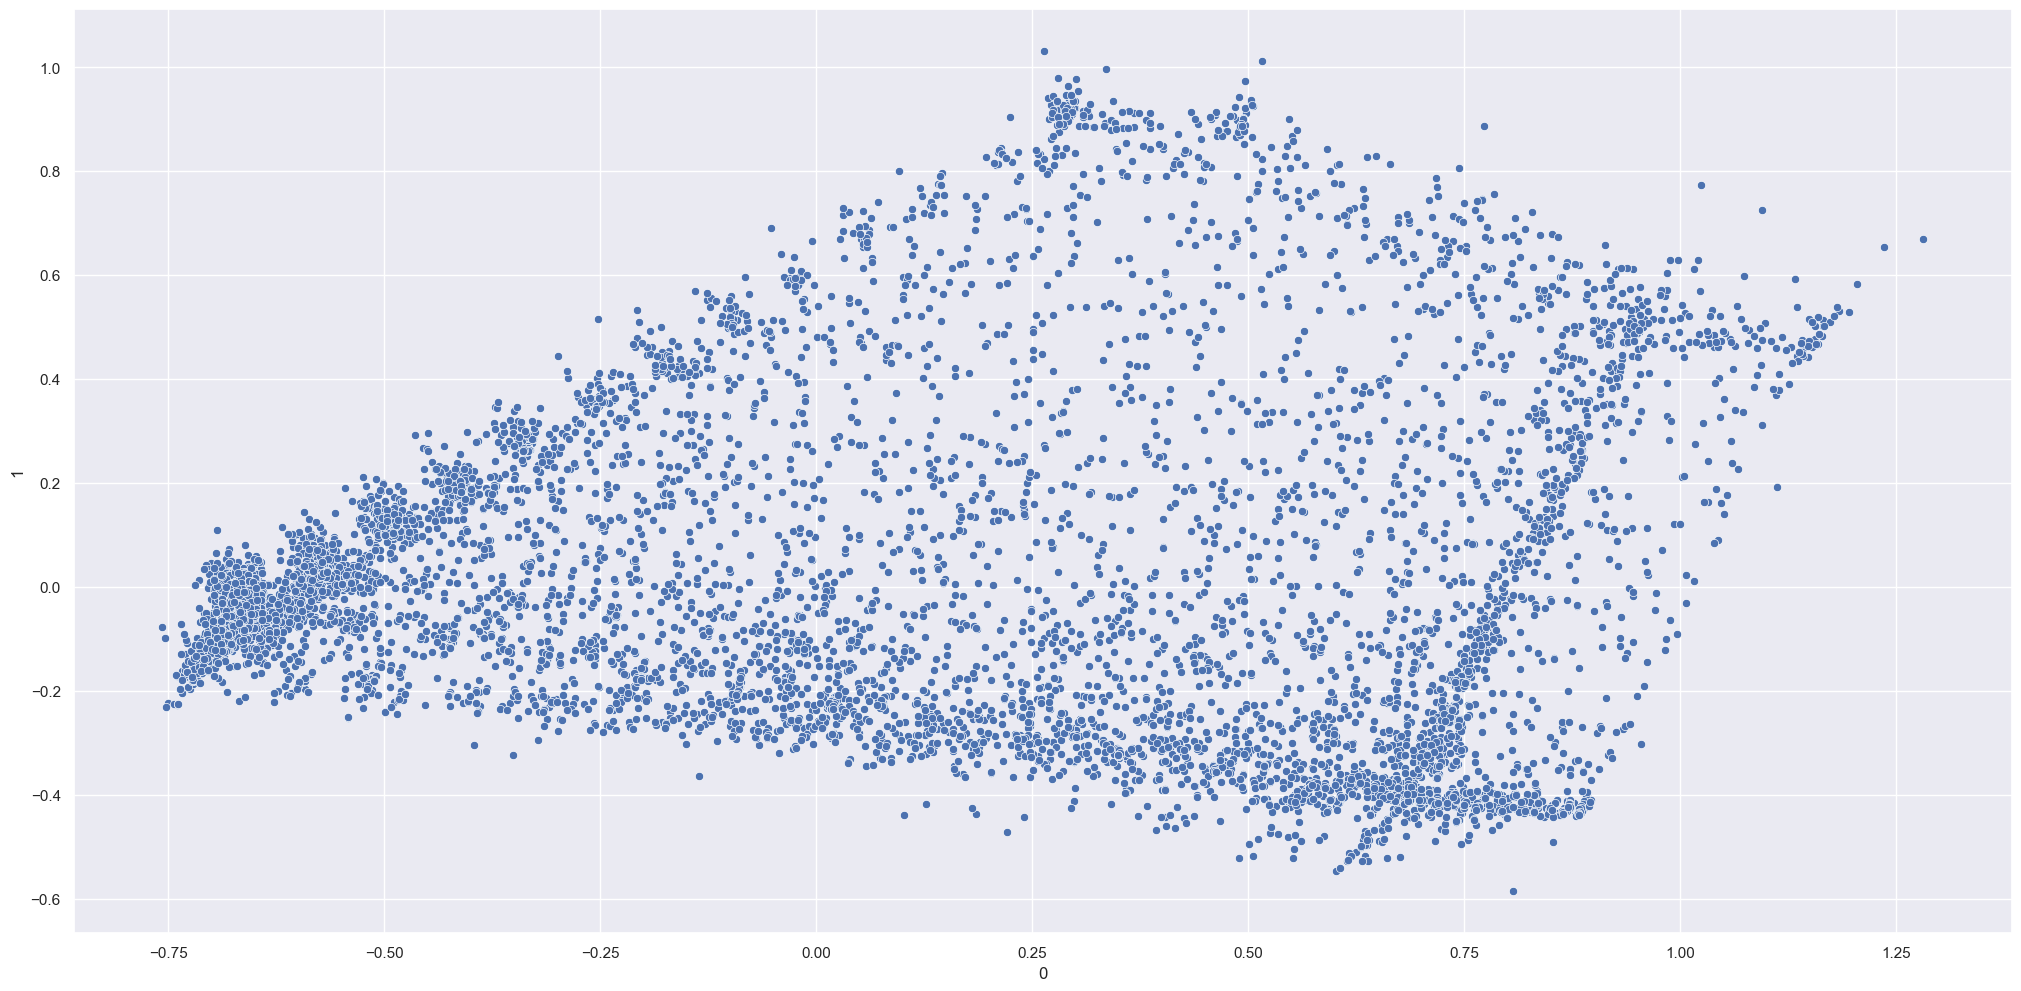

In [265]:
sns.scatterplot( x=0, y=1, data=df_pca )

### 4.5.2 Umap

In [281]:
# reducer = umap.UMAP( random_state=42 )
# embedding = reducer.fit_transform( x )

# # Embedding
# df_pca['embedding_x'] = embedding[:, 0]
# df_pca['embedding_y'] = embedding[:, 1]


# # Plot UMAP
# sns.scatterplot( x='embedding_x',
#                  y='embedding_y',
#                  data = df_pca )

### 4.5.3 T-SNE

<AxesSubplot: xlabel='embedding_x', ylabel='embedding_y'>

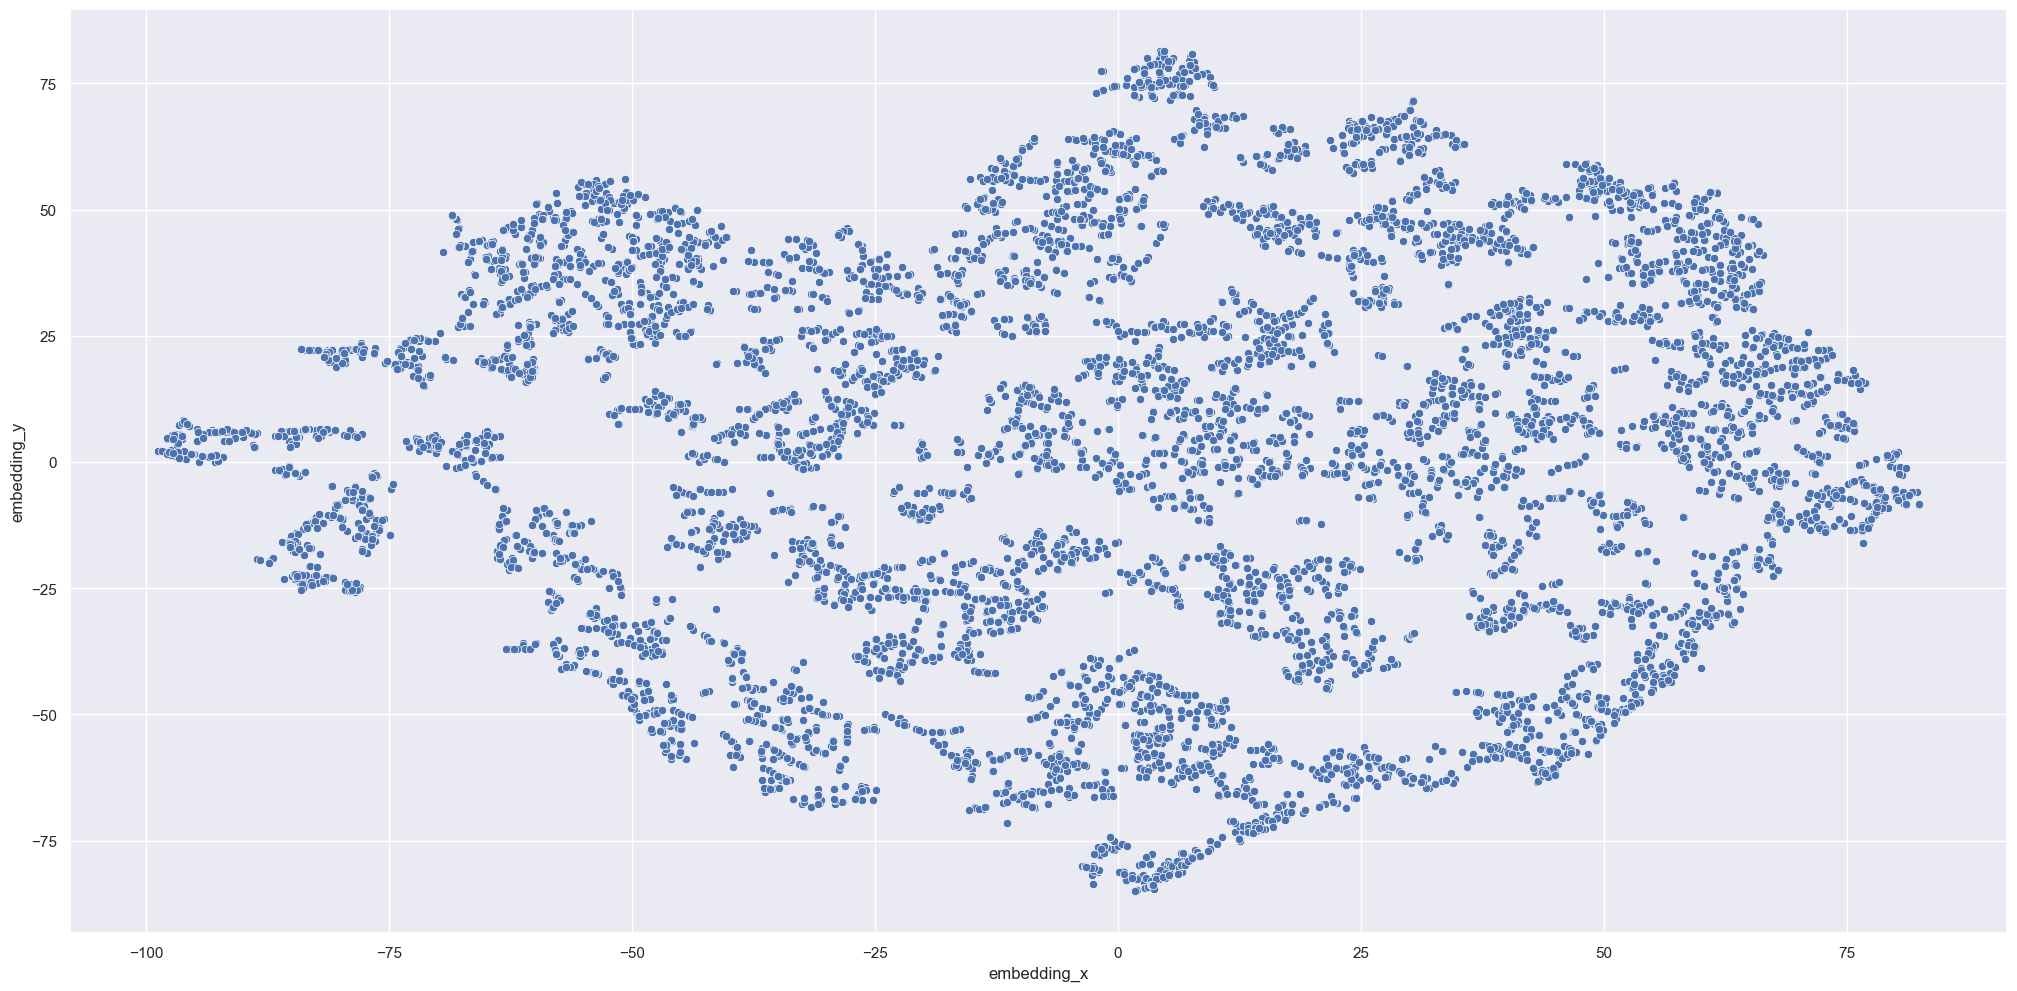

In [284]:
reducer = mn.TSNE( n_components=2, random_state=42, n_jobs =1)

embedding = reducer.fit_transform( x )

# Embedding
df_pca['embedding_x'] = embedding[:, 0]
df_pca['embedding_y'] = embedding[:, 1]


# Plot UMAP
sns.scatterplot( x='embedding_x',
                 y='embedding_y',
                 data = df_pca )

## 4.6 Embeding Definition

# 5.0 Data Preparation

In [210]:
df5 = df4.copy()

# 6.0 Feature Selection

In [211]:
df6 = df5.copy()

# 7.0 Fine Tunning Hyperparameter

In [212]:
df7 = df6.copy()

x = df7.drop( columns=['id'] )


## 7.1 KMeans

In [213]:
clusters = [2, 3, 4, 5, 6, 7, 8]

silhouette_list = []
davies_list = []

for k in clusters:
    # modeldefinition
    kmeans_model = c.KMeans( n_init=10, n_clusters=k )
    
    # model training
    kmeans_model.fit( x )
    
    # Model predict 
    labels =  kmeans_model.predict( x )
    
    # model performance
    sil = m.silhouette_score( x, labels )
    dav = m.davies_bouldin_score( x, labels )
    
    
    silhouette_list.append( sil)
    davies_list.append( dav )


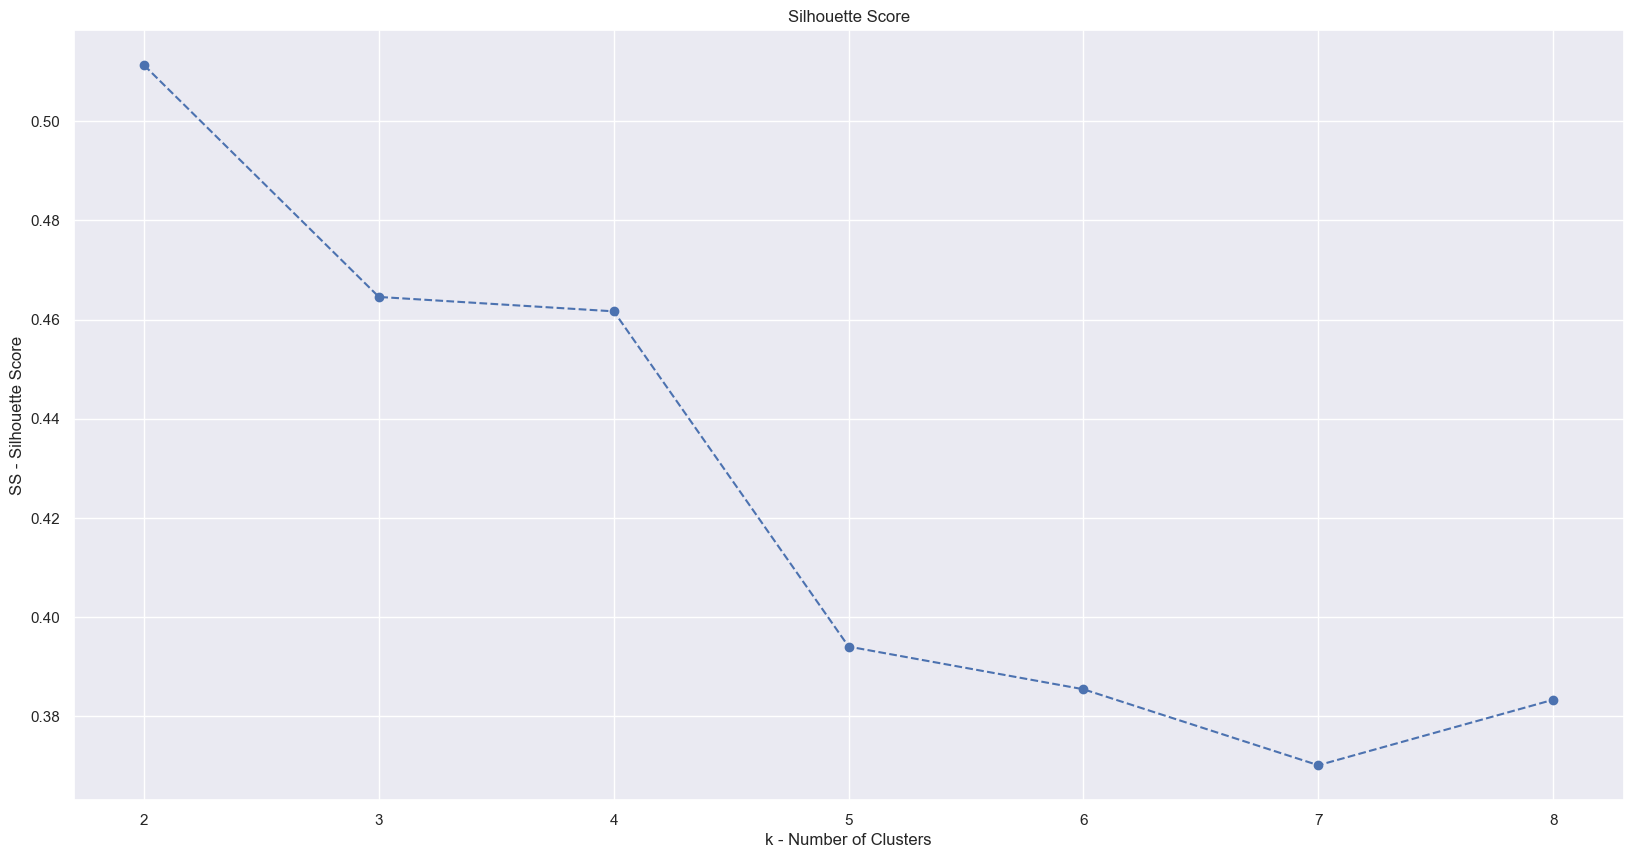

In [214]:
plt.figure( figsize=( 20, 10))
plt.plot( clusters, silhouette_list, linestyle='--', marker='o', color='b')
plt.xlabel( 'k - Number of Clusters' )
plt.ylabel( 'SS - Silhouette Score' )
plt.title('Silhouette Score');

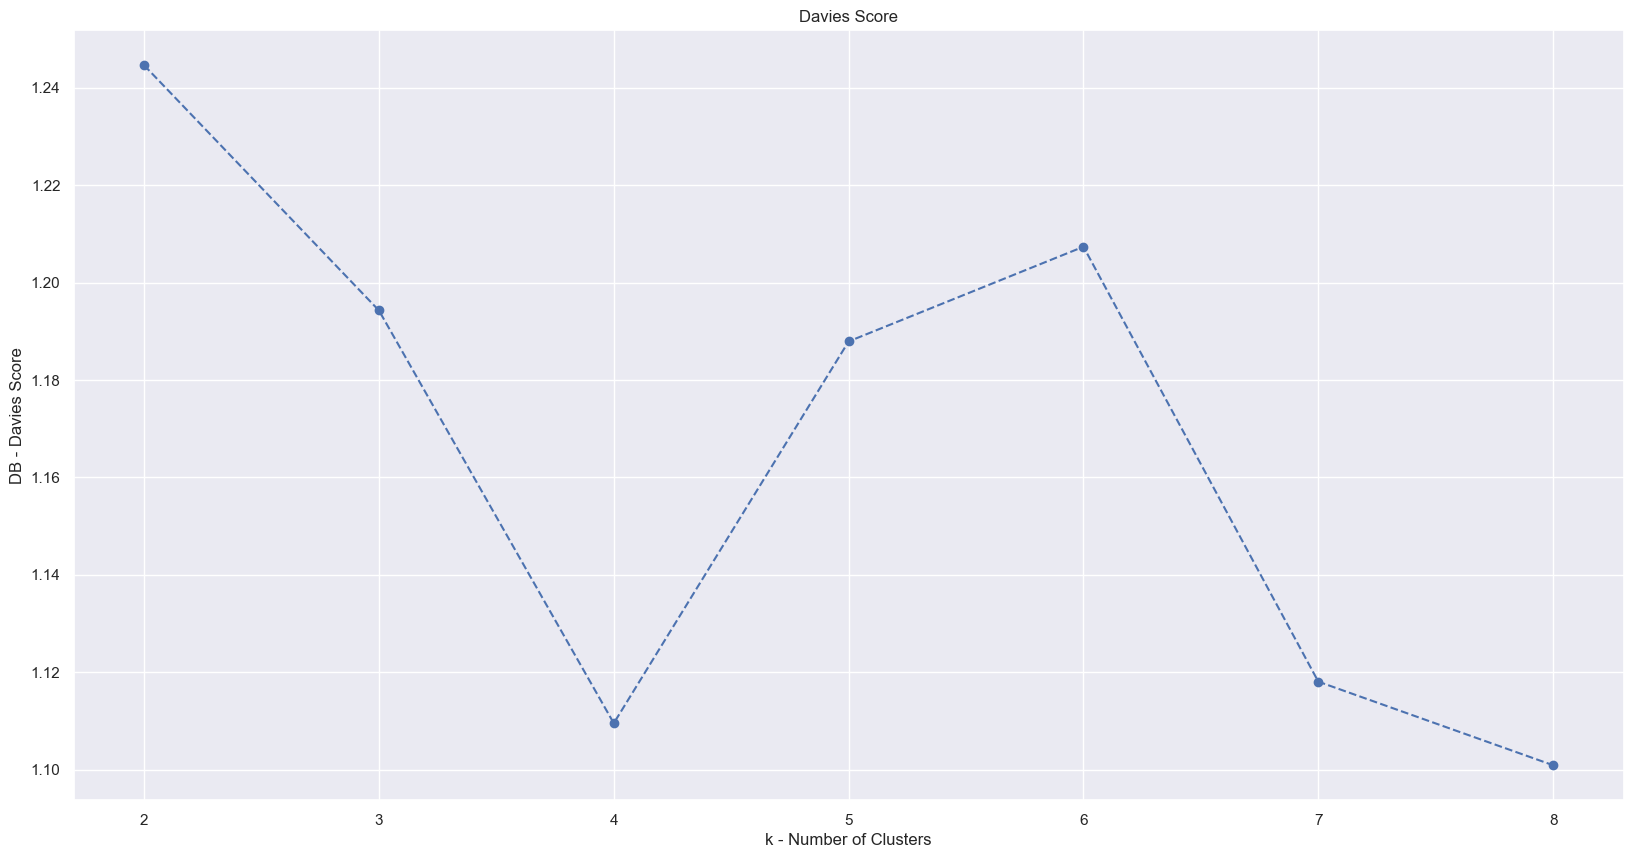

In [215]:
plt.figure( figsize=( 20, 10))
plt.plot( clusters, davies_list, linestyle='--', marker='o', color='b')
plt.xlabel( 'k - Number of Clusters' )
plt.ylabel( 'DB - Davies Score' )
plt.title('Davies Score');

# 8.0 Machine Learning

# 9.0 Clustering Analysis

# 10.0 EDA - Insight Reports

# 11.0 Deploy to Production